# Module 3 Project Part 3

## Naive Bayes

Naive Bayes is a classification algorithm that predicts the category of the data based on a probability, using Bayes' Theorem. Bayes' Theorem is used to classify probabilities of different classes given the features in the dataset, and assumes that each feature contributes to the predictions with no relation to each other (i.e. all features are independent). It is commonly used in real world classification problems such as spam filtering or sentiment analysis. 

Multinomial Naive Bayes is commonly used for text classification problems, and refers to how many times a word appears or how often a category occurs. Multinomial Naive Bayes first extracts all unique words from the training data and separates word frequencies by class. It then applies the mulitnomial Naive Bayes formula, and makes a final classification depending on the probability output. 

Bernoulli Naive Bayes follows a similar procedure, but classifies features based on binary features instead. Each word is represented using binary features indicating the presence or absence of a word. The binary features are put into a binary feature matrix, and word probabilities are computed similarly to the multinomial computation. For example, while multinomial Naive Bayes could be used to predict whether a document is spam based on the word coutns, Bernoulli Naive Bayes classifies a document as spam or not based on word presence. 

### Data Prep

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report


In [2]:
# Load in data
climate_daily = pd.read_csv("fires_climate_daily.csv")
treecover_yearly = pd.read_csv("fires_treecover_yearly.csv")
fires_yearly = pd.read_csv("fires_yearly.csv")

In [3]:
# Using daily climate info for Naive Bayes
climate_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acq_date               2465 non-null   object 
 1   fire_count             2465 non-null   int64  
 2   mean_frp               2465 non-null   float64
 3   soil_temp_level_1      11 non-null     float64
 4   soil_moisture_level_1  11 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 96.4+ KB


In [4]:
# Derive a target variable for fire risk
climate_daily["fire_risk"] = pd.cut(climate_daily["fire_count"], bins=[0,10,50, float("inf")],
                                     labels=["low", "medium", "high"])

In [5]:
# Convert data to numeric format
climate_daily['acq_date'] = pd.to_datetime(climate_daily['acq_date'])
climate_daily['day_of_year'] = climate_daily['acq_date'].dt.dayofyear

climate_daily.info()

X = climate_daily[['day_of_year', 'fire_count', 'mean_frp']]
y = climate_daily['fire_risk']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   acq_date               2465 non-null   datetime64[ns]
 1   fire_count             2465 non-null   int64         
 2   mean_frp               2465 non-null   float64       
 3   soil_temp_level_1      11 non-null     float64       
 4   soil_moisture_level_1  11 non-null     float64       
 5   fire_risk              2465 non-null   category      
 6   day_of_year            2465 non-null   int32         
dtypes: category(1), datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 108.6 KB


### Naive Bayes Classifier Implementation

In [6]:
# Drop rows with missing target values
climate_daily = climate_daily.dropna(subset=['fire_risk'])

# Scale and train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Number of instances with 1 target variable for training set
display(y_train.value_counts())

# Number of instances with one target variable for test set
display(y_test.value_counts())

fire_risk
low       1191
medium     511
high       270
Name: count, dtype: int64

fire_risk
low       300
medium    133
high       60
Name: count, dtype: int64

In [8]:
# Scale features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### Results

In [9]:
# Train Naive Bayes classifier
classifier = GaussianNB() 

classifier.fit(X_train, y_train) 

preds = classifier.predict(sc.transform(X_test))

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

        high       0.88      1.00      0.94        60
         low       0.97      0.98      0.98       300
      medium       0.98      0.89      0.93       133

    accuracy                           0.96       493
   macro avg       0.94      0.96      0.95       493
weighted avg       0.96      0.96      0.96       493



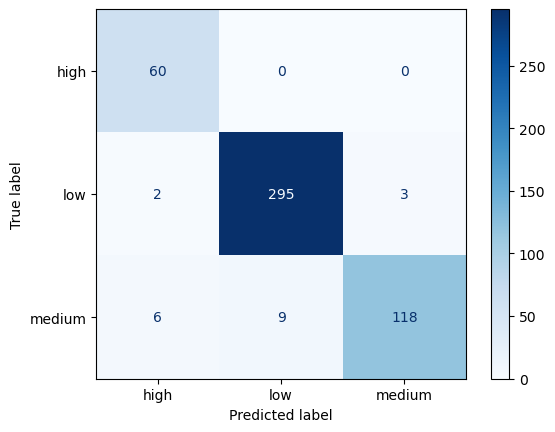

In [10]:
# Create the Confusion matrix

cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

### Conclusion

## Desicion Trees

Decision Trees are another type of classification algorithm that makes decisions by mapping out different choices and their possible outcomes. A decision tree can show different options nad how they are related in a tree-like strucutre, where the main initial question is the "root" node, representing the entire dataset. Each of the tree branches represent the different possiblities based on the features in the dataset. Decision trees are commonly used for classification problems such as customer churn predicion or fraud detection analysis. 

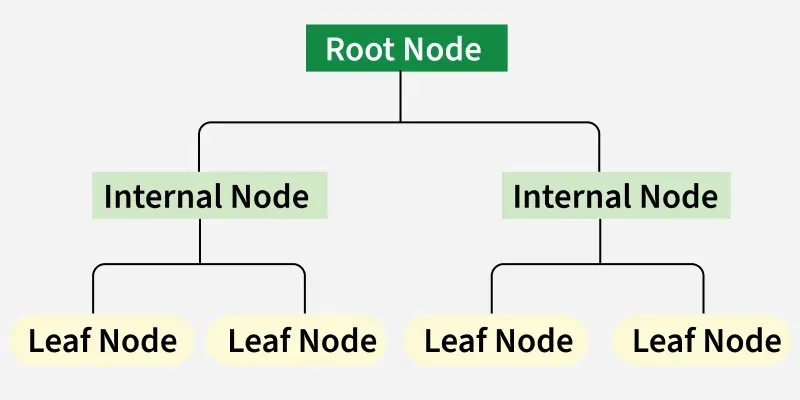

The process of splitting data at each node is based on different criteria, such as Gini Impurity, Entropy, and Information Gain. Gini Impurity is a criterion that measures how "impure" a node is, or how often a randomly chosen element would be incorrectly labeled if it was randcomly labeled according to the distribution. The lower the Gini Impurity, the better the feature splits the data into distict categories. Entropy measures the amount of uncertainty or disorder in a dataset, and the tree tries to reduce the entropy by splitting the data on features that provide the msot information about the target variable. Information Gain is a measure of how much information a feature provides about the target variable, and is calculated by measuring the reduction in entropy after splitting the data on that feature. Thus the feature with the highest information gain is selected for the split at each node. 

An example of entropy and information gain would be a dataset with 10 samples, where 6 belong to class A and 4 belong to class B. The entropy of the dataset can be calculated using the formula:  
```
Entropy(S) = - p(A) * log2(p(A)) - p(B) * log2(p(B))
           = - (6/10) * log2(6/10) - (4/10) * log2(4/10)
           = 0.97095 
```
The decision tree algorithm would then evaluate different features to split the data, calculating the information gain for each feature. The feature that provides the highest information gain would be selected for the split at the root node, and the process would continue recursively for each branch until a stopping criterion is met (e.g., maximum depth, minimum samples per leaf, etc.).

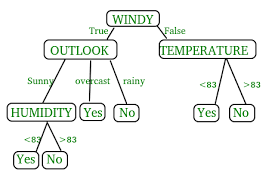

It is generally possible to create an infinite number of trees because there are many different ways to split the data at each node, and different combinations of features can lead to different tree structures. However, in practice, decision tree algorithms often have a stopping criteria to limit the size and complexity of the tree, such as setting a maximum depth or minimum number of samples per leaf node. This helps prevent overfitting and ensures that the tree generalizes well to unseen data.

### Data Prep

In [11]:
# Create copy for decision tree
climate_daily_dt = climate_daily.copy()

# Drop mostly empty columns
climate_daily_dt = climate_daily_dt.drop(columns=['soil_temp_level_1', 'soil_moisture_level_1'])

# Convert date to datetiime and extract relevant features
climate_daily_dt['acq_date'] = pd.to_datetime(climate_daily_dt['acq_date'])
climate_daily_dt['month'] = climate_daily_dt['acq_date'].dt.month
climate_daily_dt['day_of_year'] = climate_daily_dt['acq_date'].dt.dayofyear

In [12]:
# Define target (high fire activity)
climate_daily_dt["high_fire_activity"] = (climate_daily_dt["fire_count"] > 
                                          climate_daily_dt['fire_count'].median()).astype(int)

# Define features and target variable
X_dt = climate_daily_dt[['month', 'day_of_year', 'mean_frp']]
y_dt = climate_daily_dt['high_fire_activity']

### Decision Tree Classifier Implementation

In [13]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

display(y_train.value_counts()) 
display(y_test.value_counts()) 

high_fire_activity
0    1046
1     926
Name: count, dtype: int64

high_fire_activity
0    262
1    231
Name: count, dtype: int64

In [14]:
# Scaling the features 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [15]:
# Train Decision Tree Classifier (1)
classifier = DecisionTreeClassifier(random_state=0) # random state ensures reproduceability

classifier.fit(X_train, y_train)

preds = classifier.predict(X_test) # makes the predictions on the test set

/opt/anaconda3/envs/DTSC-5501/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### Results

In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.16      0.27       262
           1       0.50      0.95      0.66       231

    accuracy                           0.53       493
   macro avg       0.65      0.56      0.46       493
weighted avg       0.66      0.53      0.45       493



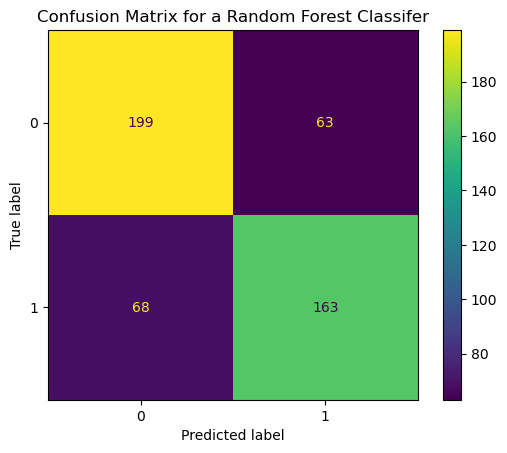

In [17]:
# Generating the confusion matrix
preds = classifier.predict(sc.transform(X_test))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
disp.ax_.set_title("Confusion Matrix for a Random Forest Classifer")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.47      1.00      0.64       231

    accuracy                           0.47       493
   macro avg       0.23      0.50      0.32       493
weighted avg       0.22      0.47      0.30       493



/opt/anaconda3/envs/DTSC-5501/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/DTSC-5501/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/DTSC-5501/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/DTSC-5501/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: 

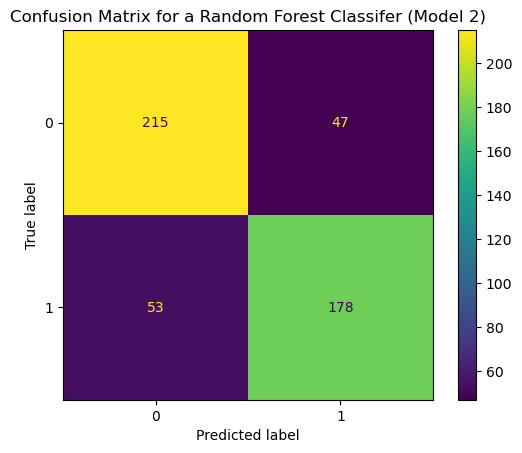

In [18]:
# Create another Decision Tree adjusting for imbalanced data
classifier = DecisionTreeClassifier(max_depth = 4, class_weight='balanced', random_state=0)

classifier.fit(X_train, y_train)

preds = classifier.predict(X_test)

print(classification_report(y_test, preds))
preds = classifier.predict(sc.transform(X_test))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
disp.ax_.set_title("Confusion Matrix for a Random Forest Classifer (Model 2)")
plt.show()

In [19]:
# Decision Tree increasing model complexity 
# Allow for a deeper tree with more splits and smaller leaf nodes
max_depth = 6
min_samples_split = 10
min_samples_leaf = 5

# Transform skewed features
climate_daily_dt['log_fire_count'] = np.log1p(climate_daily_dt['fire_count'])
climate_daily_dt['log_mean_frp'] = np.log1p(climate_daily_dt['mean_frp'])

# Add a temporal signal
climate_daily_dt['day_of-year'] = pd.to_datetime(climate_daily_dt['acq_date']).dt.dayofyear
climate_daily_dt['month'] = pd.to_datetime(climate_daily_dt['acq_date']).dt.month

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

tree3 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)
tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00        66
         low       1.00      1.00      1.00       298
      medium       1.00      1.00      1.00       129

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493



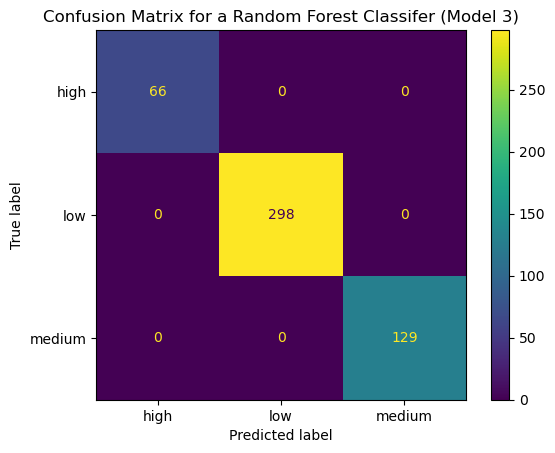

In [21]:
# generating the confusion matrix for third decision tree model
cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree3.classes_)
disp.plot()
disp.ax_.set_title("Confusion Matrix for a Random Forest Classifer (Model 3)")
plt.show()